In [1]:
import pandas as pd
import openpyxl
import statsmodels.api as sm
import matplotlib.pylab as plt
%matplotlib inline

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fd665b594c0>>
Traceback (most recent call last):
  File "/home/serway_85/proyecto_pronstico/pronostico_damis/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


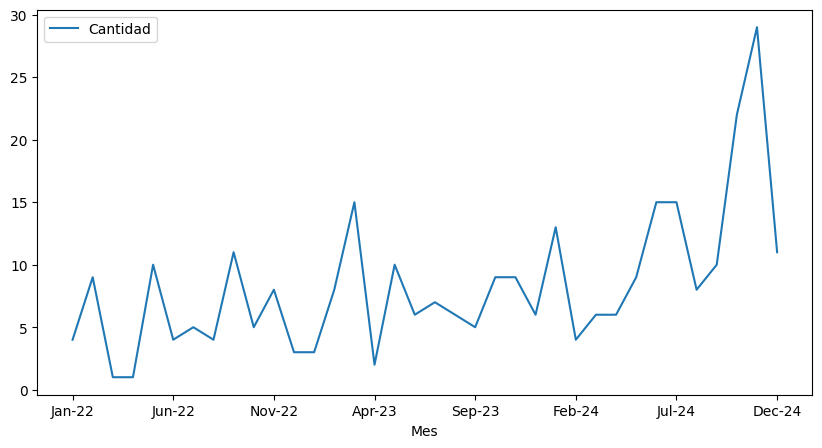

        Cantidad
Mes             
Jan-22         4
Feb-22         9
Mar-22         1
Apr-22         1
May-22        10
Jun-22         4
Jul-22         5
Aug-22         4
Sep-22        11
Oct-22         5
Nov-22         8
Dec-22         3
Jan-23         3
Feb-23         8
Mar-23        15
Apr-23         2
May-23        10
Jun-23         6
Jul-23         7
Aug-23         6
Sep-23         5
Oct-23         9
Nov-23         9
Dec-23         6
Jan-24        13
Feb-24         4
Mar-24         6
Apr-24         6
May-24         9
Jun-24        15
Jul-24        15
Aug-24         8
Sep-24        10
Oct-24        22
Nov-24        29
Dec-24        11


In [2]:
base_ventas = pd.read_excel(r"/home/serway_85/ventasParasoles (2) (2).xlsm",sheet_name='ventas',index_col='Mes')
#base_ventas = pd.read_excel(r"c:/Users/JORGE CONTRERAS/OneDrive - 900208659-2 DAMIS SAS/Escritorio/PLANEACION/consumos/INDICADORES PLANEACION/ventasParasoles (2) (2).xlsm",sheet_name='ventas',index_col='Mes')
#base_ventas['Mes']=base_ventas['Mes'].dt.strftime('%b-%y')
base_ventas_pergotek=base_ventas[(base_ventas['Familia']=='PERGOTEK') & (base_ventas['Tipo Factu']== 'PRODUCTO TERMINADO')]
total_nulos=base_ventas_pergotek.isnull().sum()
total_nulos

base_ventas

base_ventas.reset_index(inplace=True)
base_ventas['Mes'] = pd.to_datetime(base_ventas['Mes'], errors='coerce')

base_ventas.reset_index(inplace=True)
#base_ventas['Mes'] = pd.to_datetime(base_ventas['Mes'], errors='coerce')
#base_ventas['Mes'] = base_ventas['Mes'].dt.strftime('%b-%y')
base_ventas.set_index('Mes', inplace=True)
base_analisis=base_ventas[base_ventas['Familia']=='PERGOLITE']

base_analisis=base_analisis.groupby(['Mes'])['Cantidad'].sum().reset_index()
base_analisis = base_analisis.sort_values('Mes')
base_analisis['Mes'] = base_analisis['Mes'].dt.strftime('%b-%y')
base_analisis.set_index('Mes',inplace=True)

base_analisis_hot = base_analisis.copy()

ventas=base_analisis['Cantidad']
base_analisis.plot(y='Cantidad',kind='line',figsize=(10,5))
plt.show()
print(base_analisis)



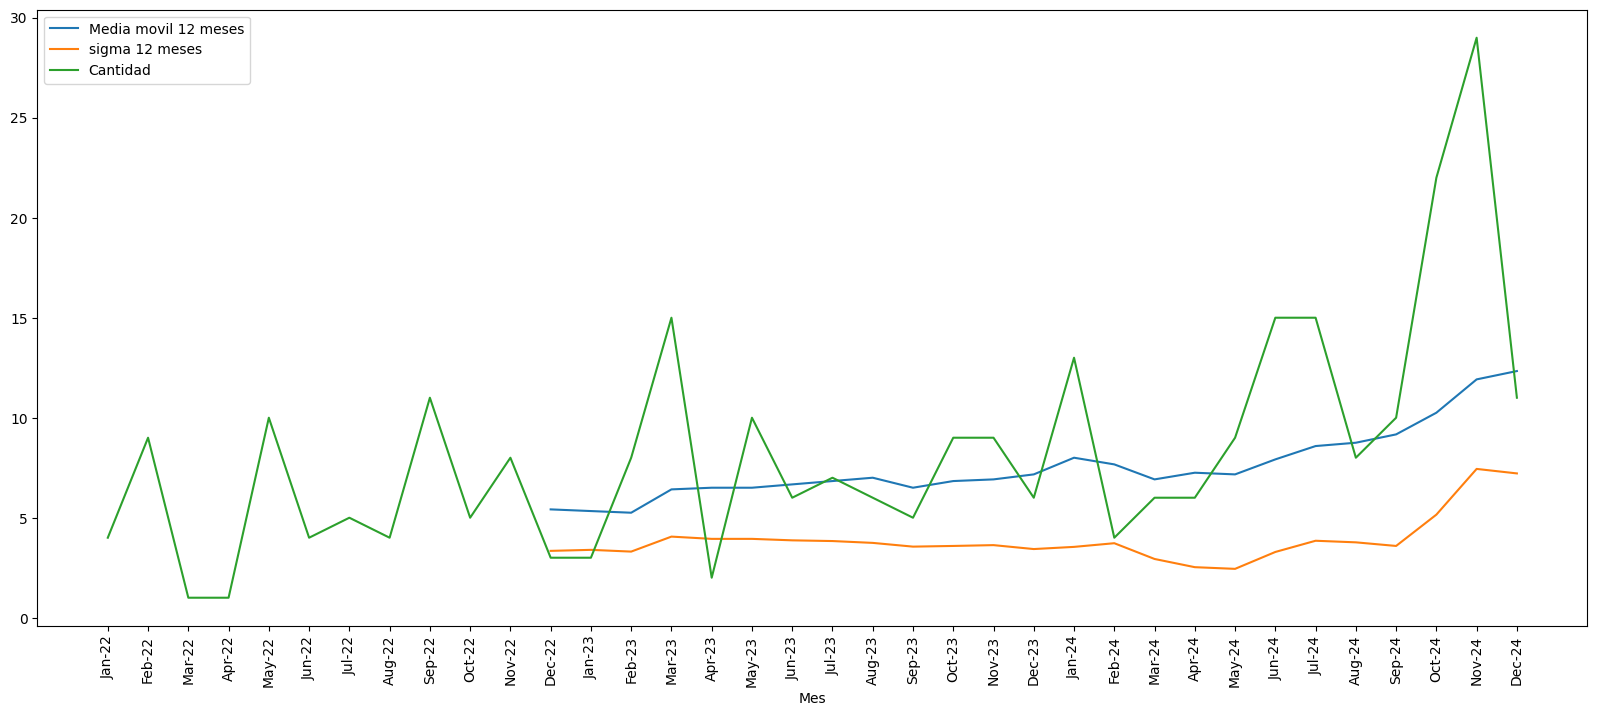

In [3]:
serietiempo = base_analisis['Cantidad']
type(serietiempo)
plt.figure(figsize=(20,8))
serietiempo.rolling(12).mean().plot(label= 'Media movil 12 meses')
serietiempo.rolling(12).std().plot(label= 'sigma 12 meses')
serietiempo.plot()
plt.xticks(rotation=90)  # Rotar los meses para que sean legibles
plt.xticks(ticks=range(len(base_analisis.index)), labels=base_analisis.index) 

plt.legend()


In [ ]:
#prueba de dickey-fuller aumentada

In [4]:
from statsmodels.tsa.stattools import adfuller

In [5]:
resultado = adfuller(base_analisis['Cantidad'])

resultado


(np.float64(1.8733452263693748),
 np.float64(0.9984839088686107),
 10,
 25,
 {'1%': np.float64(-3.7238633119999998),
  '5%': np.float64(-2.98648896),
  '10%': np.float64(-2.6328004)},
 np.float64(158.0428133410473))

In [6]:
#diferenciacion
base_analisis['Primera diferencia'] = base_analisis['Cantidad'] - base_analisis['Cantidad'].shift(1)

<Axes: xlabel='Mes'>

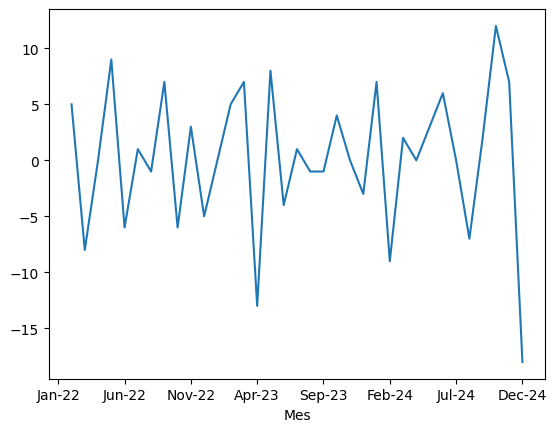

In [7]:
base_analisis['Primera diferencia'].plot()

In [8]:
adfuller(base_analisis['Primera diferencia'].dropna())

(np.float64(-6.906877921597722),
 np.float64(1.2407368346209286e-09),
 2,
 32,
 {'1%': np.float64(-3.653519805908203),
  '5%': np.float64(-2.9572185644531253),
  '10%': np.float64(-2.6175881640625)},
 np.float64(154.08523203562956))

In [9]:
base_analisis['Segunda diferencia'] = base_analisis['Primera diferencia'] - base_analisis['Primera diferencia'].shift(1)

<Axes: xlabel='Mes'>

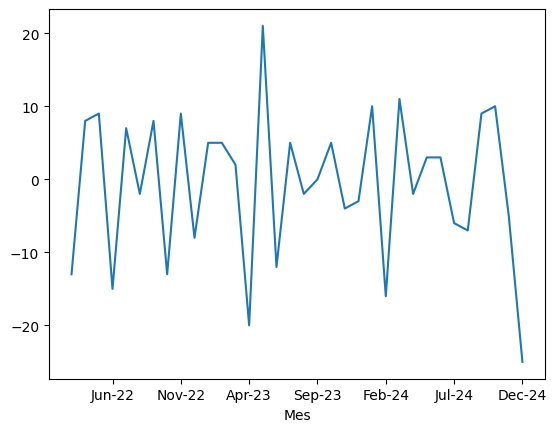

In [10]:
base_analisis['Segunda diferencia'].plot()

In [11]:
adfuller(base_analisis['Segunda diferencia'].dropna())

(np.float64(-4.048655900552571),
 np.float64(0.0011761053791723617),
 8,
 25,
 {'1%': np.float64(-3.7238633119999998),
  '5%': np.float64(-2.98648896),
  '10%': np.float64(-2.6328004)},
 np.float64(147.60173493464566))

In [48]:
#diferencia con estacionalidad
base_analisis['Diferencia Estacionalidad'] = base_analisis['Cantidad'] - base_analisis['Cantidad'].shift(11)

<Axes: xlabel='Mes'>

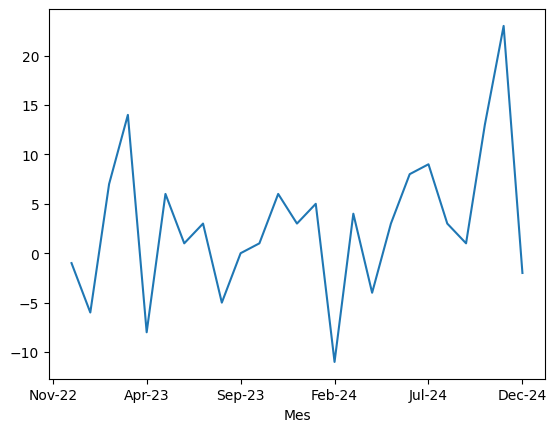

In [49]:
base_analisis['Diferencia Estacionalidad'].plot()

In [50]:
adfuller(base_analisis['Diferencia Estacionalidad'].dropna())

(np.float64(-4.790049965804698),
 np.float64(5.682033891299803e-05),
 0,
 24,
 {'1%': np.float64(-3.7377092158564813),
  '5%': np.float64(-2.9922162731481485),
  '10%': np.float64(-2.635746736111111)},
 np.float64(106.80159512903455))

In [51]:
base_analisis['Primera Diferencia Estacionalidad'] = base_analisis['Primera diferencia'] - base_analisis['Primera diferencia'].shift(11)

<Axes: xlabel='Mes'>

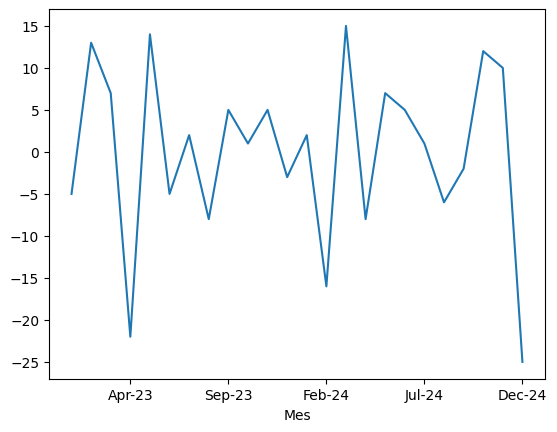

In [52]:
base_analisis['Primera Diferencia Estacionalidad'].plot()

In [53]:
adfuller(base_analisis['Primera Diferencia Estacionalidad'].dropna())

(np.float64(-5.680418334740975),
 np.float64(8.511680580404306e-07),
 2,
 21,
 {'1%': np.float64(-3.7883858816542486),
  '5%': np.float64(-3.013097747543462),
  '10%': np.float64(-2.6463967573696143)},
 np.float64(104.52949622238336))

PARTIR LA BASE

<Axes: xlabel='Mes'>

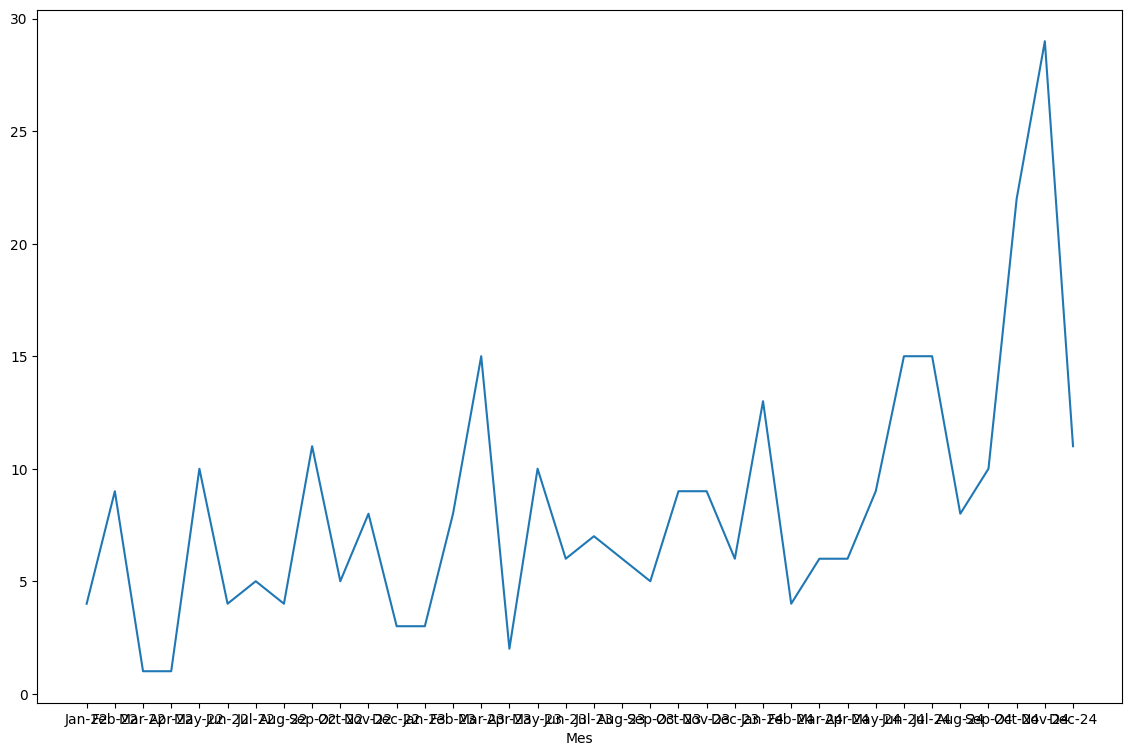

In [54]:
#partir la base en entrenamiento y prueba
plt.figure(figsize=(14,9))
plt.xticks(rotation=90)  # Rotar los meses para que sean legibles
plt.xticks(ticks=range(len(base_analisis.index)), labels=base_analisis.index) 
base_analisis['Cantidad'].plot()

In [55]:
BaseA = base_analisis[0:36]
BaseB = base_analisis[34:]
BaseA

,Cantidad,Primera diferencia,Segunda diferencia,Diferencia Estacionalidad,Primera Diferencia Estacionalidad
Mes,,,,,
Jan-22,4,NaN,NaN,NaN,NaN
Feb-22,9,5.0,NaN,NaN,NaN
Mar-22,1,-8.0,-13.0,NaN,NaN
Apr-22,1,0.0,8.0,NaN,NaN
May-22,10,9.0,9.0,NaN,NaN
Jun-22,4,-6.0,-15.0,NaN,NaN
Jul-22,5,1.0,7.0,NaN,NaN
Aug-22,4,-1.0,-2.0,NaN,NaN
Sep-22,11,7.0,8.0,NaN,NaN


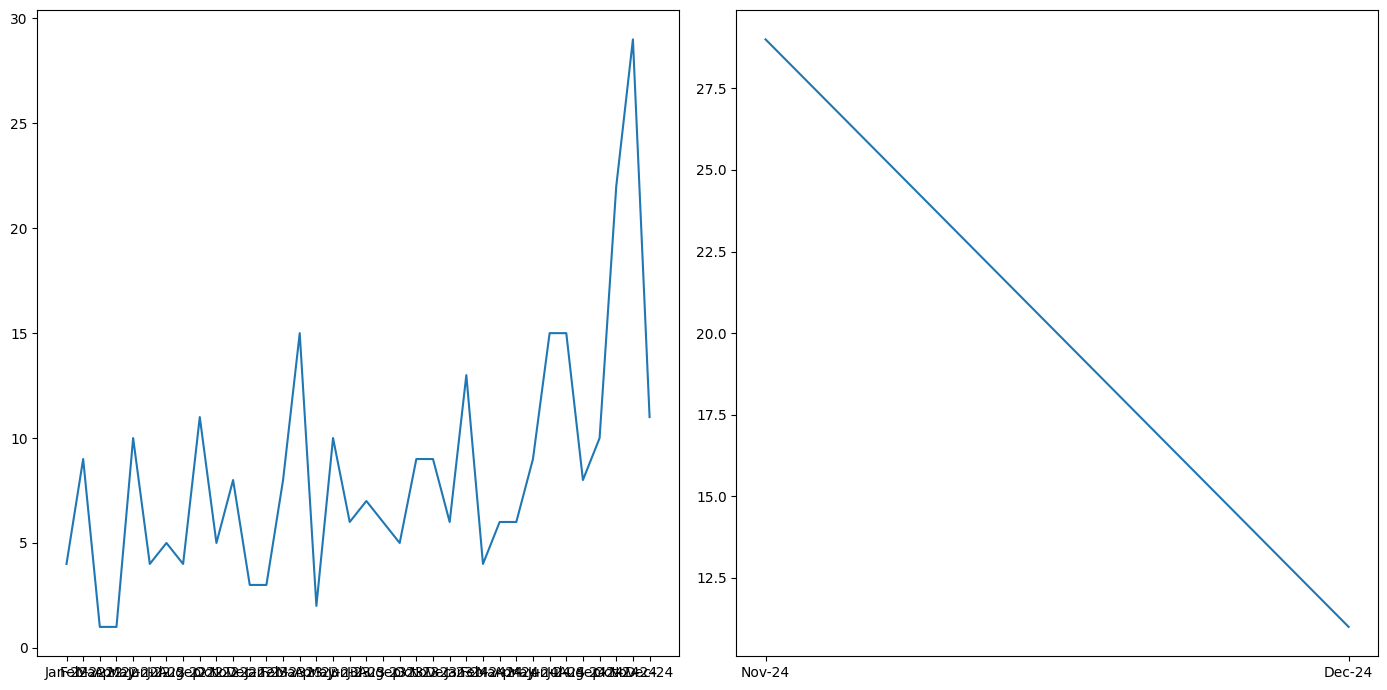

In [56]:

plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
plt.plot(BaseA['Cantidad'],label='Ventas producto')


plt.subplot(1,2,2)
plt.plot(BaseB['Cantidad'],label='Ventas producto')


plt.tight_layout()



COMPONENTES ACF Y PACF

In [57]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

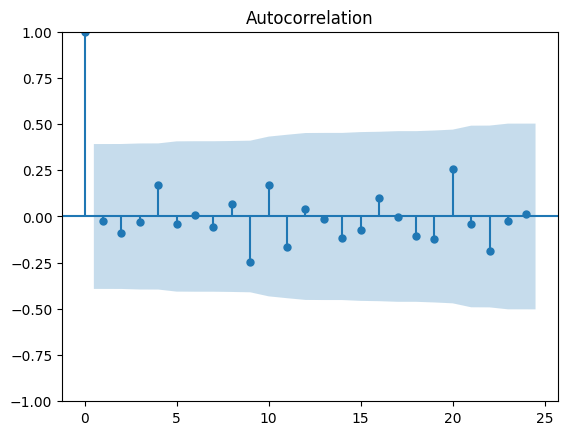

In [59]:
acf=plot_acf(BaseA['Diferencia Estacionalidad'].dropna(), lags=24)





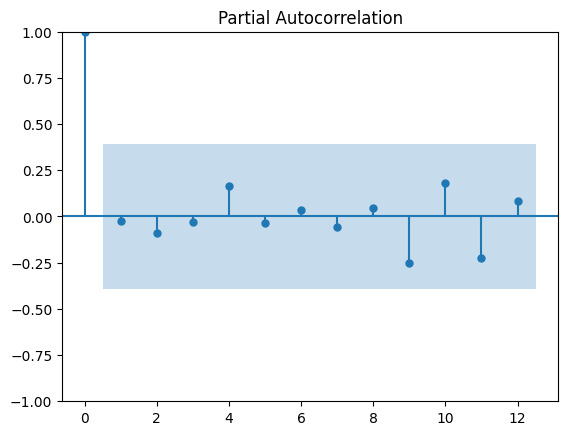

In [61]:
pacf=plot_pacf(BaseA['Diferencia Estacionalidad'].dropna(), lags=12)

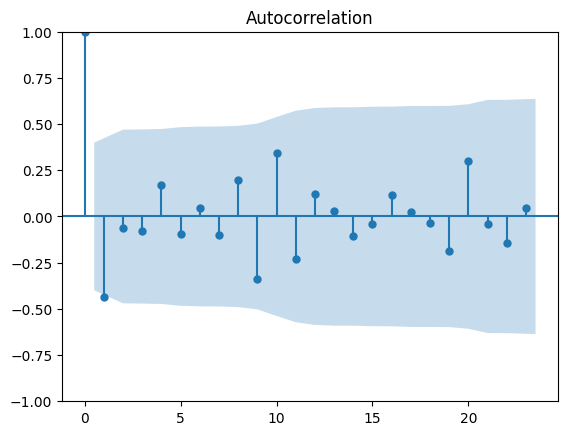

In [63]:
acf1=plot_acf(BaseA['Primera Diferencia Estacionalidad'].dropna(), lags=23)


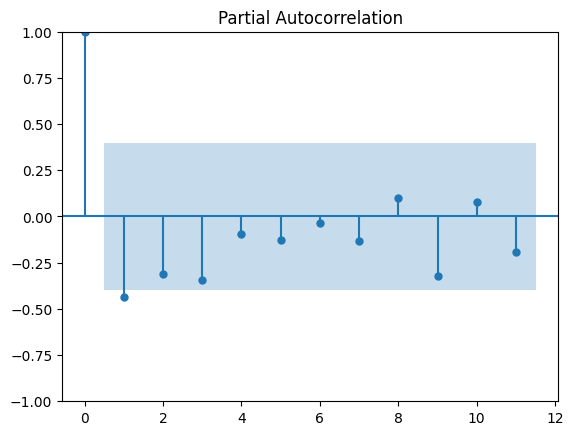

In [65]:
pacf1=plot_pacf(BaseA['Primera Diferencia Estacionalidad'].dropna(), lags=11)


In [26]:
from statsmodels.tsa.arima_model import  ARIMA

In [66]:
modelo = sm.tsa.statespace.SARIMAX(BaseA['Cantidad'],order=(1,1,1),seasonal_order=(0,1,0,12))

/home/serway_85/proyecto_pronstico/pronostico_damis/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/serway_85/proyecto_pronstico/pronostico_damis/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/serway_85/proyecto_pronstico/pronostico_damis/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/serw

In [28]:
resultados = modelo.fit()

In [29]:
print(resultados.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           Cantidad   No. Observations:                   36
Model:             SARIMAX(2, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 -76.655
Date:                            Tue, 18 Feb 2025   AIC                            159.310
Time:                                    04:35:05   BIC                            162.716
Sample:                                         0   HQIC                           160.167
                                             - 36                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5729      0.215     -2.662      0.008      -0.995      -0.151
ar.L2         -0.4967      0.196   

Index(['Jan-22', 'Feb-22', 'Mar-22', 'Apr-22', 'May-22', 'Jun-22', 'Jul-22',
       'Aug-22', 'Sep-22', 'Oct-22', 'Nov-22', 'Dec-22', 'Jan-23', 'Feb-23',
       'Mar-23', 'Apr-23', 'May-23', 'Jun-23', 'Jul-23', 'Aug-23', 'Sep-23',
       'Oct-23', 'Nov-23', 'Dec-23', 'Jan-24', 'Feb-24', 'Mar-24', 'Apr-24',
       'May-24', 'Jun-24', 'Jul-24', 'Aug-24', 'Sep-24', 'Oct-24', 'Nov-24',
       'Dec-24'],
      dtype='object', name='Mes')


/home/serway_85/proyecto_pronstico/pronostico_damis/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/serway_85/proyecto_pronstico/pronostico_damis/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/serway_85/proyecto_pronstico/pronostico_damis/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/serw

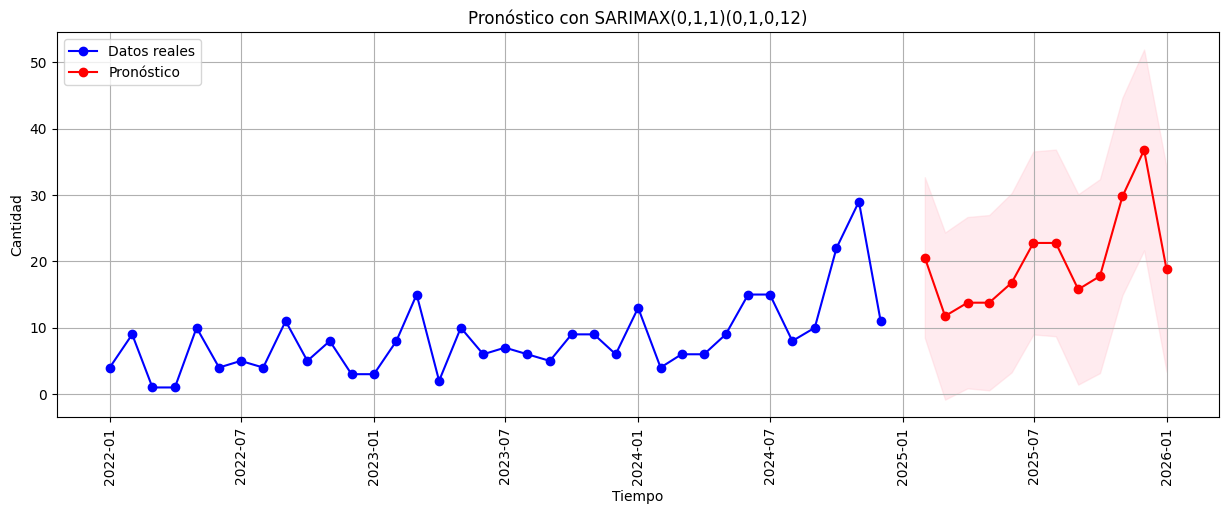

        Fecha  Pronóstico  Límite Inferior  Límite Superior
0  2025-01-31   20.572507         8.472059        32.672956
1  2025-02-28   11.757726        -0.828513        24.343965
2  2025-03-31   13.771061         0.868138        26.673985
3  2025-04-30   13.772021         0.569558        26.974485
4  2025-05-31   16.772091         3.277402        30.266779
5  2025-06-30   22.772096         8.991424        36.552767
6  2025-07-31   22.772096         8.711260        36.832931
7  2025-08-31   15.772096         1.436571        30.107621
8  2025-09-30   17.772096         3.167047        32.377145
9  2025-10-31   29.772096        14.902407        44.641785
10 2025-11-30   36.772096        21.642396        51.901796
11 2025-12-31   18.772096         3.386778        34.157414


In [67]:
print(BaseA.index)


# 1️⃣ Crear el modelo SARIMAX
modelo_final = sm.tsa.statespace.SARIMAX(BaseA['Cantidad'],
                                         order=(1,1,1), 
                                         seasonal_order=(0,1,0,12),
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)

resultado = modelo_final.fit()

# 2️⃣ Hacer predicciones para los próximos 12 meses
periodos_prediccion = 12
predicciones = resultado.get_forecast(steps=periodos_prediccion)
intervalo_confianza = predicciones.conf_int()

# 3️⃣ Generar las fechas futuras para el eje X
BaseA.index = pd.to_datetime(BaseA.index, format='%b-%y')

if pd.isnull(BaseA.index[-1]):
    print("Error: Última fecha en BaseA no es válida")
else:
    fechas_futuras = pd.date_range(start=BaseA.index[-1] + pd.DateOffset(months=1), 
                                   periods=periodos_prediccion, freq='M')

# 4️⃣ Graficar los resultados
plt.figure(figsize=(15,5))
plt.plot(BaseA.index, BaseA['Cantidad'], label='Datos reales', color='blue', marker='o')
plt.plot(fechas_futuras, predicciones.predicted_mean, label='Pronóstico', color='red', marker='o')

# 5️⃣ Agregar etiquetas de valores en los puntos de pronóstico
# Asegurar que predicciones tengan las fechas correctas
predicciones_df = pd.DataFrame({'Prediccion': predicciones.predicted_mean}, index=fechas_futuras)

for i, (fecha, txt) in enumerate(predicciones_df.itertuples()):
    plt.annotate(f"{txt:.1f}", (fecha, txt), 
                 textcoords="offset points", xytext=(0,5), ha='center', fontsize=10, color='red')


# 6️⃣ Agregar banda de intervalo de confianza
plt.fill_between(fechas_futuras, 
                 intervalo_confianza.iloc[:, 0], 
                 intervalo_confianza.iloc[:, 1], 
                 color='pink', alpha=0.3)

# 7️⃣ Personalizar la visualización
plt.xticks(rotation=90)  # Rotar etiquetas del eje X
plt.xlabel('Tiempo')
plt.ylabel('Cantidad')
plt.title('Pronóstico con SARIMAX(0,1,1)(0,1,0,12)')
plt.legend()
plt.grid()

# 8️⃣ Mostrar la gráfica
plt.show()

tabla_pronostico = pd.DataFrame({
    'Fecha': fechas_futuras,  # Fechas futuras
    'Pronóstico': predicciones.predicted_mean.values,  # Valores pronosticados
    'Límite Inferior': intervalo_confianza.iloc[:, 0].values,  # Intervalo inferior
    'Límite Superior': intervalo_confianza.iloc[:, 1].values   # Intervalo superior
})

# Mostrar la tabla en pantalla
print(tabla_pronostico)

# Opcional: Guardar la tabla en un archivo CSV
tabla_pronostico.to_excel('pro.xlsx', index=False)


In [32]:
base_analisis_hot.to_excel('base.xlsx')

In [31]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

        Cantidad
Mes             
Jan-22         4
Feb-22         9
Mar-22         1
Apr-22         1
May-22        10
Jun-22         4
Jul-22         5
Aug-22         4
Sep-22        11
Oct-22         5
Nov-22         8
Dec-22         3
Jan-23         3
Feb-23         8
Mar-23        15
Apr-23         2
May-23        10
Jun-23         6
Jul-23         7
Aug-23         6
Sep-23         5
Oct-23         9
Nov-23         9
Dec-23         6
Jan-24        13
Feb-24         4
Mar-24         6
Apr-24         6
May-24         9
Jun-24        15
Jul-24        15
Aug-24         8
Sep-24        10
Oct-24        22
Nov-24        29
Dec-24        11


/home/serway_85/proyecto_pronstico/pronostico_damis/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/serway_85/proyecto_pronstico/pronostico_damis/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/serway_85/proyecto_pronstico/pronostico_damis/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/home/serway_85/proyecto_pronstico/pronostico_damis/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index i

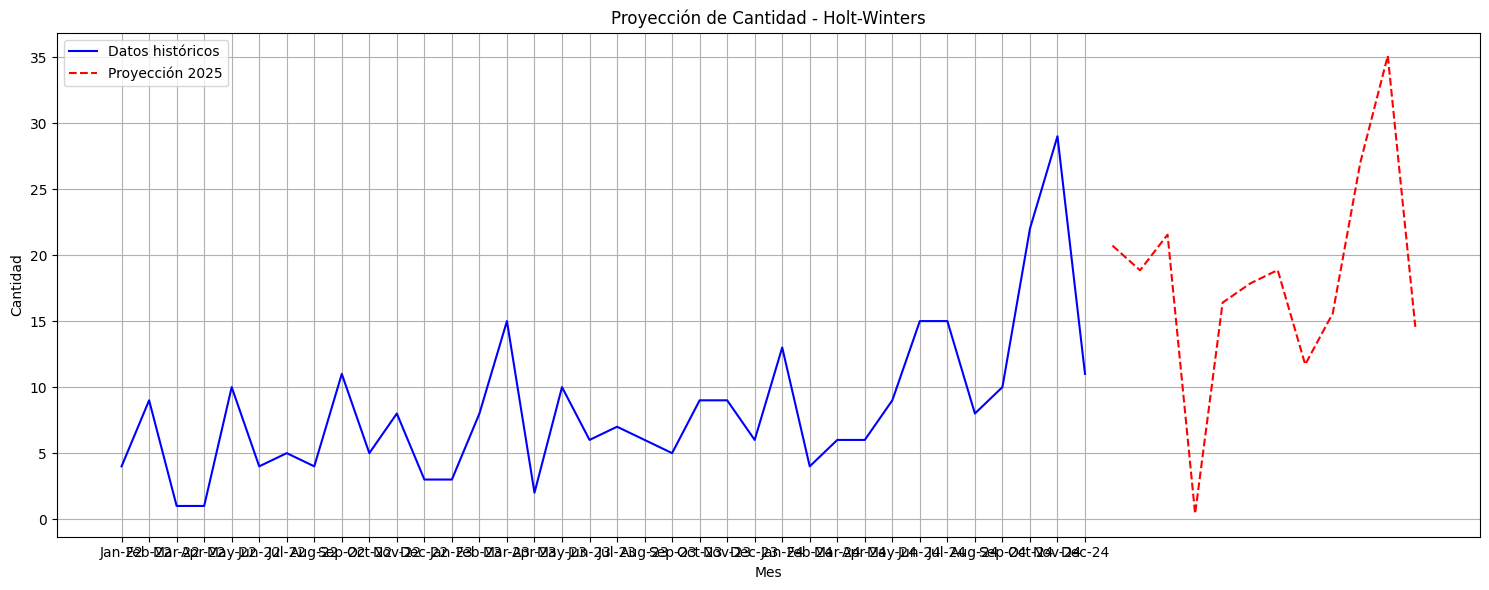

In [39]:
# Cargar el archivo Excel

print(base_analisis_hot)
# Convertir 'Mes' a formato de fecha y establecer como índice
#base_analisis_hot['Mes'] = pd.to_datetime(base_analisis_hot['Mes'], format='%b-%y')
#base_analisis_hot.set_index('Mes', inplace=True)

# Ajustar el modelo Holt-Winters con estacionalidad mensual
model = ExponentialSmoothing(base_analisis_hot['Cantidad'], trend='mul', seasonal='mul', seasonal_periods=12)
fit = model.fit()

# Predecir de enero a diciembre de 2025
future_dates = pd.date_range(start='2025-01-01', end='2025-12-01', freq='MS')
forecast = fit.forecast(len(future_dates))

# Guardar el pronóstico en un archivo Excel
forecast_df = pd.DataFrame({'Mes': future_dates.strftime('%b-%y'), 'Proyeccion': forecast.values})
forecast_df.to_excel('proyeccion_2025.xlsx', index=False)

# Graficar el resultado
plt.figure(figsize=(15, 6))
plt.plot(base_analisis_hot.index, base_analisis_hot['Cantidad'], label='Datos históricos', color='blue')
plt.plot(forecast.index, forecast.values, label='Proyección 2025', color='red', linestyle='--')
plt.title('Proyección de Cantidad - Holt-Winters')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


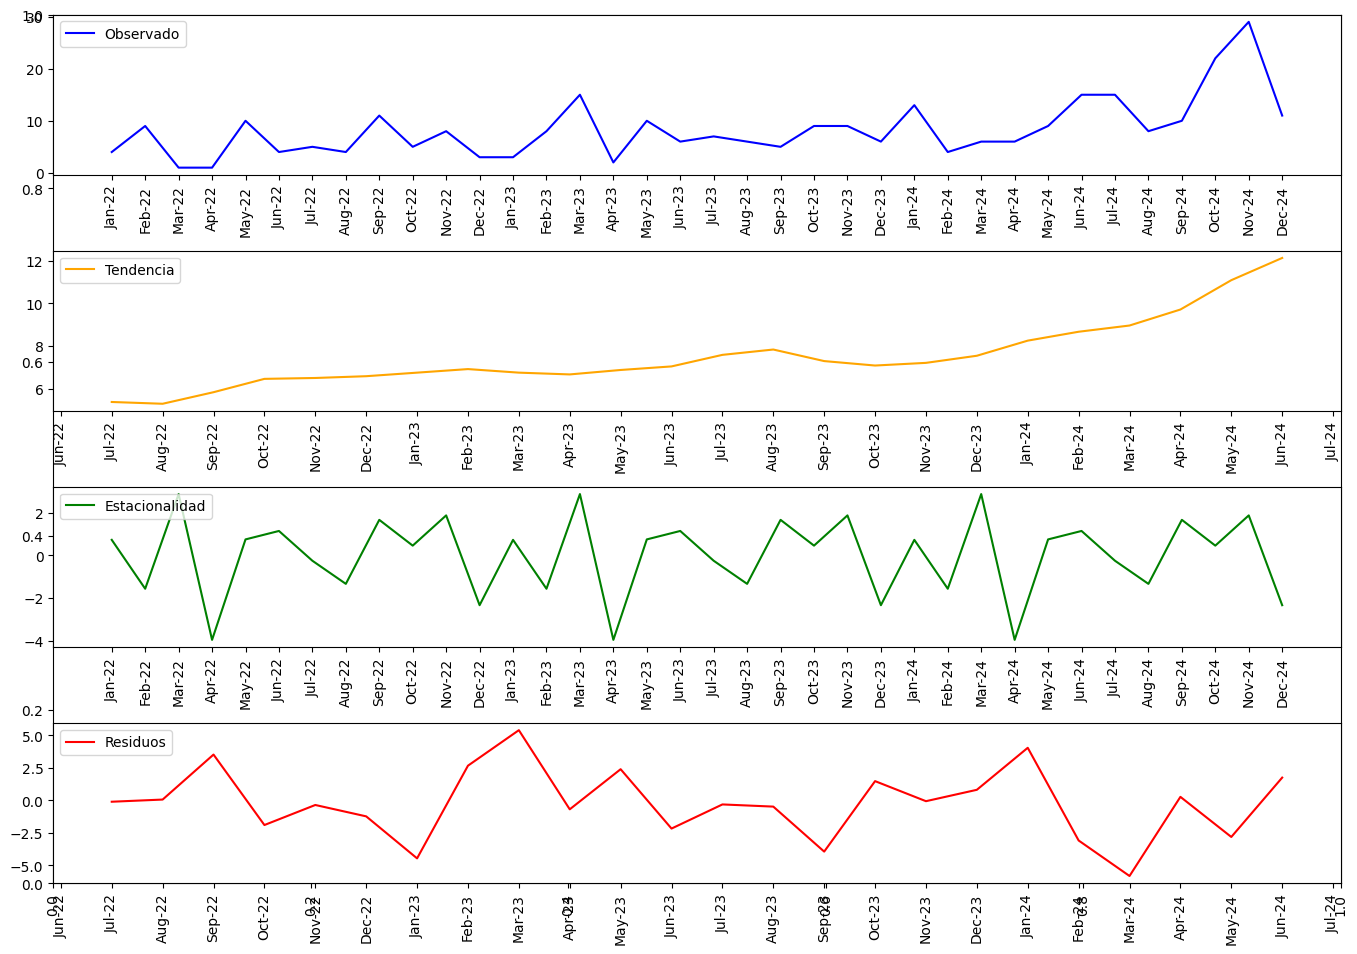

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(base_analisis_hot, model='additive', period=12)
# Graficar los componentes: Observado, Tendencia, Estacionalidad y Residuos
plt.figure(figsize=(14, 10))
plt.xticks(rotation=90)
plt.subplot(411)
plt.plot(decomposition.observed, label='Observado', color='blue')
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.subplot(412)
plt.plot(decomposition.trend, label='Tendencia', color='orange')
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Estacionalidad', color='green')
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuos', color='red')
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

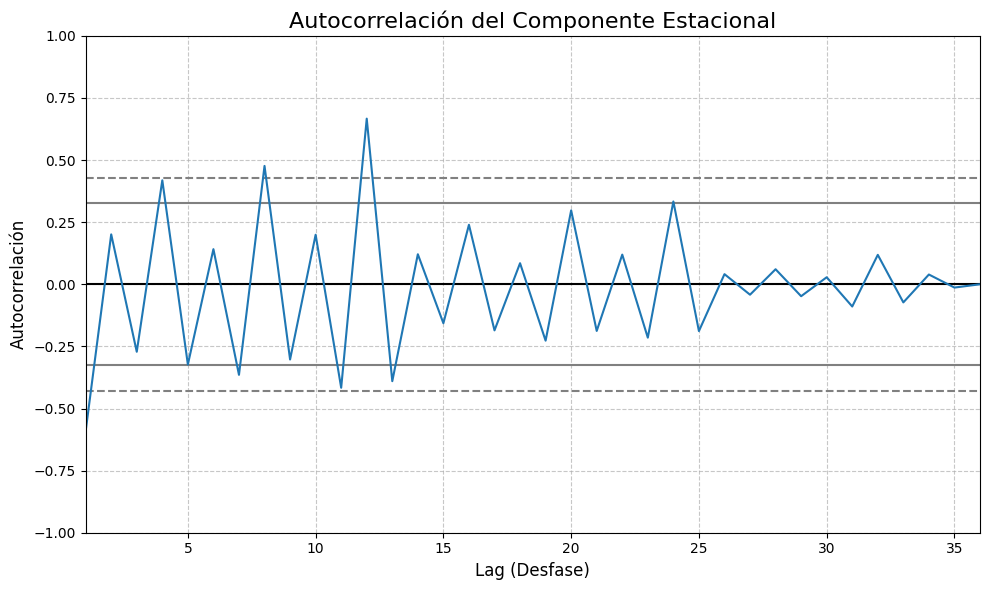

In [47]:
from pandas.plotting import autocorrelation_plot

# Graficar la autocorrelación del componente estacional
plt.figure(figsize=(10, 6))
autocorrelation_plot(decomposition.seasonal)
plt.title('Autocorrelación del Componente Estacional', fontsize=16)
plt.xlabel('Lag (Desfase)', fontsize=12)
plt.ylabel('Autocorrelación', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
